In [1]:
#! pip install torch
!pip install colabcode

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [51]:
data = pd.read_csv('./ML-HW1/insurance.csv')

In [52]:
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

# data info
- row= 1338 (nunber of data)
- columns = 7 (number of feature)

In [53]:
# for age
age = data['age']
age_cat = pd.Categorical(age)
# bmi
bmi = data['bmi']
bmi_cat = pd.Categorical(bmi)
#charges
chager = data['charges']
charger_cat = pd.Categorical(chager)
# children 
children = data['children']
children_cat = pd.Categorical(children)
# region 
region = data['region']
region_cat = pd.Categorical(region)
# sex
sex = data['sex']
sex_cat = pd.Categorical(sex)
smoker = data['smoker']
smoker_cat = pd.Categorical(smoker)

In [54]:

age_cat

[19, 18, 28, 33, 32, ..., 50, 18, 18, 21, 61]
Length: 1338
Categories (47, int64): [18, 19, 20, 21, ..., 61, 62, 63, 64]

In [55]:
bmi_cat

[27.900, 33.770, 33.000, 22.705, 28.880, ..., 30.97, 31.92, 36.85, 25.80, 29.07]
Length: 1338
Categories (548, float64): [15.960, 16.815, 17.195, 17.290, ..., 49.06, 50.38, 52.58, 53.13]

In [56]:
charger_cat

[16884.92400, 1725.55230, 4449.46200, 21984.47061, 3866.85520, ..., 10600.5483, 2205.9808, 1629.8335, 2007.9450, 29141.3603]
Length: 1338
Categories (1337, float64): [1121.8739, 1131.5066, 1135.9407, 1136.3994, ..., 58571.07448, 60021.39897, 62592.87309, 63770.42801]

In [57]:
children_cat

[0, 1, 3, 0, 0, ..., 3, 0, 0, 0, 0]
Length: 1338
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [58]:
region_cat

['southwest', 'southeast', 'southeast', 'northwest', 'northwest', ..., 'northwest', 'northeast', 'southeast', 'southwest', 'northwest']
Length: 1338
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

In [59]:
sex_cat

['female', 'male', 'male', 'male', 'male', ..., 'male', 'female', 'female', 'female', 'female']
Length: 1338
Categories (2, object): ['female', 'male']

In [60]:
smoker_cat

['yes', 'no', 'no', 'no', 'no', ..., 'no', 'no', 'no', 'no', 'yes']
Length: 1338
Categories (2, object): ['no', 'yes']

code above is answer two and three see the all categories and regions.

In [61]:
# max income 
data.loc[data['charges'] == data['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [62]:
for i in region_cat.categories:
    mean_region = data.loc[data['region'] == i]['charges'].mean()
    print(f"{i} : {mean_region}")



northeast : 13406.384516385804
northwest : 12417.57537396923
southeast : 14735.411437609888
southwest : 12346.937377292308


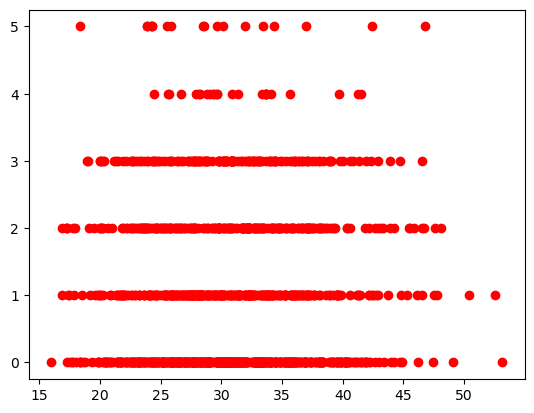

In [63]:
plt.scatter(bmi,children,c='r')
plt.show()

In [64]:
children_regoin={}
for i in region_cat.categories:
    children_regoin[i] = data.loc[i==data['region']]['children'].sum()
max(children_regoin, key=lambda k: children_regoin[k])

'southeast'

In [65]:
# 9
data[data['bmi'] > 30]['bmi'].count()

705

In [66]:
bmi_types = {'Underweight':[0.0, 18.5], 'Normal weight':[18.5, 24.5], 'Overweight':[24.5, 30], 'Obese':[30.0, 200.0]}

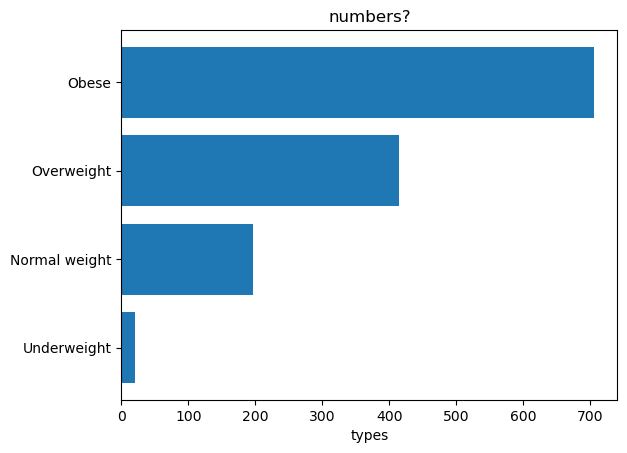

In [67]:

result = {}
for key, value in bmi_types.items():
    p = bmi[bmi > value[0]][bmi <= value[1]].count()
    result[key] = p

fig, ax = plt.subplots()

 # Example data
ax.barh(list(result.keys()),list(result.values()),  align='center')
ax.set_xlabel('types')
ax.set_title('numbers?')

plt.show()


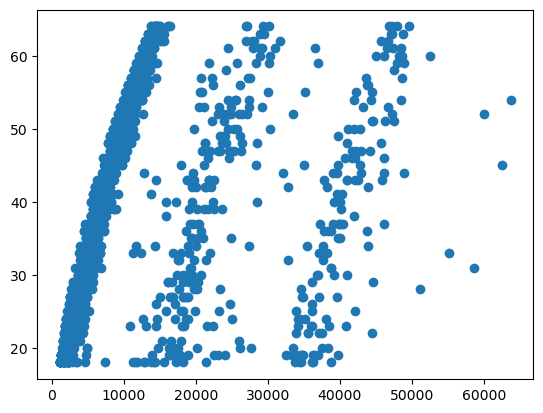

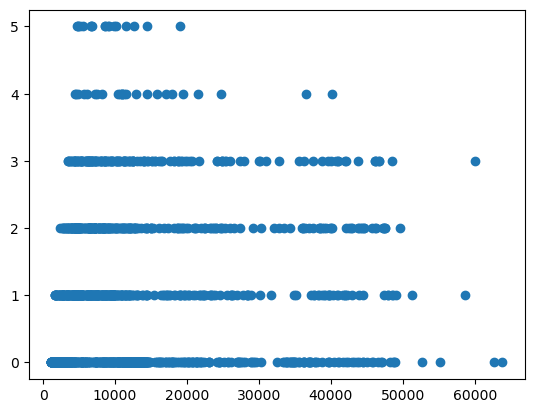

In [68]:
plt.scatter(chager, age)
plt.show()
plt.scatter(chager, children)
plt.show()

In [69]:
data[:2]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [70]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le_sex = LabelEncoder()
le_re = LabelEncoder()
le_smo = LabelEncoder()


# encode the dataset using label encoding
data['sex'] = le_sex.fit_transform(data['sex'])
data['smoker'] = le_smo.fit_transform(data['smoker'])
data['region'] = le_re.fit_transform(data['region'])

# print the encoded dataset
print(data)


      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [71]:
le_sex.inverse_transform(data['sex'])

array(['female', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [72]:
data = data.astype('float32')
data.dtypes

age         float32
sex         float32
bmi         float32
children    float32
smoker      float32
region      float32
charges     float32
dtype: object

In [73]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


#16
>**Answer**: if the dependecies of feature is more than normal we can say feature are same act and can remove that,

In [74]:
from sklearn.preprocessing import normalize, StandardScaler

In [75]:
data[:4]

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,1.0,3.0,16884.923828
1,18.0,1.0,33.770,1.0,0.0,2.0,1725.552246
2,28.0,1.0,33.000,3.0,0.0,2.0,4449.461914
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.470703


In [76]:
data['bmi'] = StandardScaler().fit_transform(np.array(data['bmi'][:]).reshape(-1,1))
data['charges'] = StandardScaler().fit_transform(np.array(data['charges'][:]).reshape(-1,1))

In [77]:
data

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,-0.453320,0.0,1.0,3.0,0.298584
1,18.0,1.0,0.509621,1.0,0.0,2.0,-0.953689
2,28.0,1.0,0.383307,3.0,0.0,2.0,-0.728675
3,33.0,1.0,-1.305531,0.0,0.0,1.0,0.719843
4,32.0,1.0,-0.292557,0.0,0.0,1.0,-0.776802
...,...,...,...,...,...,...,...
1333,50.0,1.0,0.050296,3.0,0.0,1.0,-0.220551
1334,18.0,0.0,0.206139,0.0,0.0,0.0,-0.914002
1335,18.0,0.0,1.014878,0.0,0.0,2.0,-0.961596
1336,21.0,0.0,-0.797814,0.0,0.0,3.0,-0.930362


In [78]:
print(data[5:])
data = data.iloc[np.random.permutation(len(data))].reset_index(drop=True)
print(data[5:])

       age  sex       bmi  children  smoker  region   charges
5     31.0  0.0 -0.807656       0.0     0.0     2.0 -0.785908
6     46.0  0.0  0.455486       1.0     0.0     2.0 -0.415500
7     37.0  0.0 -0.479567       3.0     0.0     1.0 -0.494728
8     37.0  1.0 -0.136714       2.0     0.0     0.0 -0.567017
9     60.0  0.0 -0.791252       0.0     0.0     1.0  1.293027
...    ...  ...       ...       ...     ...     ...       ...
1333  50.0  1.0  0.050296       3.0     0.0     1.0 -0.220551
1334  18.0  0.0  0.206139       0.0     0.0     0.0 -0.914002
1335  18.0  0.0  1.014878       0.0     0.0     2.0 -0.961596
1336  21.0  0.0 -0.797814       0.0     0.0     3.0 -0.930362
1337  61.0  0.0 -0.261388       0.0     1.0     1.0  1.311053

[1333 rows x 7 columns]
       age  sex       bmi  children  smoker  region   charges
5     26.0  0.0  1.925325       1.0     0.0     3.0 -0.814515
6     24.0  1.0 -0.354893       2.0     0.0     1.0 -0.803993
7     30.0  0.0  1.375776       3.0     1.0  

In [79]:
import math
percent_train = 80
train_size = math.floor(len(data)*percent_train/100)
test_size = math.ceil(len(data)*(100 - percent_train)/100)
train_size, test_size

(1070, 268)

In [80]:
train_data = data[:train_size]
test_data = data[train_size+1:]
len(train_data), len(test_data)

(1070, 267)

# 19
we have 7 feature and every feature has effect to y for example ${x^i}$ has a some effect and we represend that by coefficient and the percent of the coefficient is correlation coefficient and for each type of model we have some way to caculate for example Pearson's product moment correlation coefficient (r) is for linear regression we can understand  effect of $x^i$ to model. 

# 20
the save data may be happen and get noise of data and by test we can say data is good or bad.
by GD repat that and get good function we got the good function but may be this not have converge and must be careful to this.

In [81]:
# 21
data = np.array(data)
data = np.insert(data,0,[1 for i in range(len(data))], axis=1)
print(data[0])

[ 1.         18.          1.         -0.21217448  1.          0.
  2.         -0.9541944 ]


In [82]:
def lin_reg(X, O):
    return np.dot(X,O)

In [83]:
def compute_cost(x, y, w, b):
    # number of training examples
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost


def compute_cost_multi_feature(x, y, w, b):
    m = x.shape[0]
    feature_number = x.shape[1]
    print(feature_number)
    cost_sum = 0
    for i in range(m - 1):
        cost = 0
        f_wb = 0
        for k in range(feature_number -1 ):
          f_wb = w[k] * x[i][k] + f_wb
        f_wb = f_wb + b
        cost = (f_wb - y[i]) ** 2 + cost
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

$cost(x_i) \leq zf(x_i) + (1- z)f(x_j) \leq f(x_j)$

$\sigma  / \sigma \theta((X \theta - y)^T(X\theta - y)) =>
 2 X^TX \theta  - X^Ty = 0 =>
 \newline
 2X^ TX \theta  - X^Ty = 0 =>
 \newline
 2X^TX \theta = X^T y =>
$
final we have:
$ \theta = (X^TX)^-1.(X^Ty) $

In [84]:
def linear_regression_normal_equation(X, y):
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_y = np.dot(X_transpose, y)
    theta = np.linalg.solve(X_transpose_X, X_transpose_y)
    return theta

In [85]:
x_train = train_data.drop('charges', axis=1)
y_train = train_data['charges']

x_test = test_data.drop('charges', axis=1)
y_test = np.array(test_data['charges'])
x_test = np.insert(np.array(x_test), 0, [1 for i in range(len(x_test))], axis=1)
x_train = np.insert(np.array(x_train), 0, [1 for i in range(len(x_train))], axis=1)


In [86]:
thta = linear_regression_normal_equation(x_train, y_train)
compute_cost_multi_feature(x_test, y_test, thta[1:], thta[0])

7


3.48889204320538

In [87]:
thta

array([-1.2214346 ,  0.02109651, -0.0140325 ,  0.17042647,  0.04432644,
        1.9680557 , -0.02931179], dtype=float32)

# 27
for this way we must spearate the y and x and train data and test data and for big number of feature computing is hard.

In [88]:

def grudiant_decsion(x, y, w, b, alfa=0.4, iteration=500):
    m = x.shape[0]
    feature_number = x.shape[1]
    dj_b = 0
    dj_w = 0
    sum = 0
    for iter in range(iteration):
        for i in range(m - 1):
            f_wb = 0
            for j in range(feature_number - 1):
                f_wb = x[i,j] * w[j] + f_wb
            f_wb = f_wb + b
            sum = f_wb + sum
        dj_w = (((f_wb - y[i]) * x[i][1:]) )
        dj_b = (f_wb - y[i])
        dj_w = dj_w / m
        dj_b = dj_b / m
        b = b - alfa * dj_b
        w = w - alfa * dj_w
    return w,b


    
    

In [89]:
w_train , b_train = grudiant_decsion(x_train[1:], y_train, [np.random.randint(10) for i in range(x_train.shape[1] - 1)], np.random.randint(10), 0.95)

In [90]:
compute_cost_multi_feature(x_test, y_test, w_train, b_train)

7


215.6664022229298

# 31, 32
for the alfa i find 0.9 is good rate and number of the interation is 500 is good for data if the rate of alfa is small the itration must be bigger and the time to function go to converge is longger and if the alfa is bigger the convege may be not happended.